# Wprowadzenie do numpy

In [7]:
import numpy as np

import time #for testing

Numpy (numeric python) to przede wszystkim biblioteka obliczeniowa uzywana głównie przy:
 - analizie danych,
 - obliczeniach naukowych,
 - pracy z duzymi tablicami liczbowymi.

Podstawową komórką, która sprawia ze numpy jest tak istotne w powyzszych zastosowaniach jest ndarray - szybka i wydajna tablica wielowymiarowa, która zastępuje listy pythona w zastosowaniach obliczeniowych.

In [8]:
first_lst = [1,2,3]
second_lst = [2,2,2]

first_lst + second_lst

[1, 2, 3, 2, 2, 2]

In [9]:
start = time.time()
def add_lists(a,b):
    result = []
    for x,y in zip(a,b):
        result.append(x+y)
    return result
stop = time.time()
print(add_lists(first_lst, second_lst), f'Czas wykonania funkcji: {stop-start}')

[3, 4, 5] Czas wykonania funkcji: 0.0001628398895263672


In [10]:
start = time.time()
c = [x + y for x, y in zip(first_lst, second_lst)]
stop = time.time()
print(c, f'Czas wykonania operacji: {stop-start}')

[3, 4, 5] Czas wykonania operacji: 0.00013494491577148438


In [11]:
first_array = np.array(first_lst)
second_array = np.array([2,2,2])

In [12]:
start = time.time()
result_array = first_array + second_array
stop = time.time()
print(result_array, f'Czas wykonania operacji: {stop-start}')

[3 4 5] Czas wykonania operacji: 0.00013208389282226562


Jak widać operacje na arrayach są nie dość, ze wygodniejsze to jeszcze szybsze, ale to nie jedyne przewagi tych typów danych nad klasycznymi listami.

In [17]:
A_matrix = np.array([[1,2,3],
                    [4,5,6],
                    [7,8,9]])

In [19]:
B_matrix = np.array([[1,1,1],
                     [2,2,2],
                     [3,3,3]])

In [21]:
np.dot(A_matrix, B_matrix)

array([[14, 14, 14],
       [32, 32, 32],
       [50, 50, 50]])

In [20]:
A_matrix * B_matrix

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

Wynik powyzszej operacji jest tak zwanym iloczynem Hadamarda, jest on wyjątkowo pomocny przy własnych implementacjach algorytmów uczenia maszynowego. Wstawiam ku przestrodze zeby nikt się nie pomylił próbując mnozyć macierze.

Numpy posiada te wbudowane funkcje do wyliczania momentów i realizowania zmiennych losowych.

In [13]:
x = np.linspace(0,10,1000)

In [17]:
y = x**4 - 3*x**3 + 2*x**2 + 10*x -100

In [20]:
import matplotlib.pyplot as plt

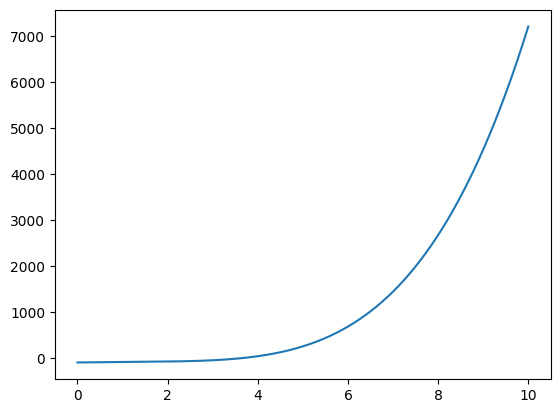

In [21]:
plt.plot(x,y)

In [22]:
y_mean = y.mean()
y_var = y.var()

In [23]:
y_normalized = (y - y_mean)/y_var

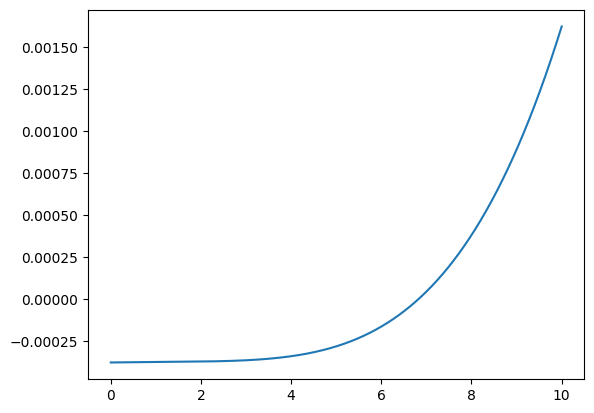

In [24]:
plt.plot(x,y_normalized)

In [27]:
def exp_generator(lambda_param, size=1):
    U = np.random.uniform(0, 1, size)
    return -np.log(1 - U) / lambda_param

(array([50., 21., 17.,  4.,  4.,  2.,  0.,  1.,  0.,  1.]),
 array([1.00698102e-03, 2.86538654e-01, 5.72070326e-01, 8.57601999e-01,
        1.14313367e+00, 1.42866534e+00, 1.71419702e+00, 1.99972869e+00,
        2.28526036e+00, 2.57079204e+00, 2.85632371e+00]),
 <BarContainer object of 10 artists>)

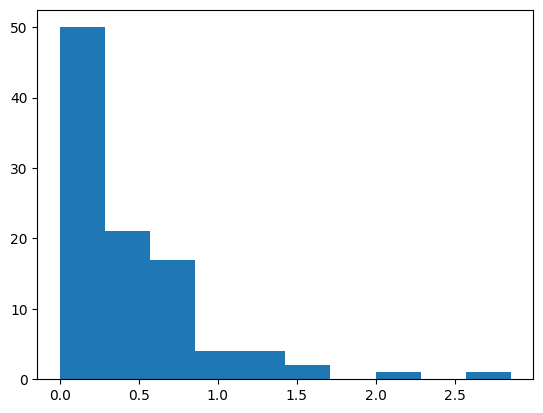

In [28]:
exp_gen = exp_generator(2, 100)
plt.hist(exp_gen)

In [29]:
def comp_poisson(T, lam):       #zlozony proces poissona zgodny z algorytmem z listy 5
    s = []
    t = 0.0
    a = np.linspace(0, T, 1000)
    M = np.max(lam(a))
    while t <= T:
        u1 = np.random.rand()
        t -= np.log(u1) / M
        if t > T:
            return s
        u2 = np.random.rand()
        if u2 < lam(t) / M:
            s.append(t)
    return s

In [30]:
def lamb(t):
    return 2 * (np.sin(t))**2

In [31]:
simp = comp_poisson(10, lamb)   # generujemy próbkę do przykładowej trajektorii 

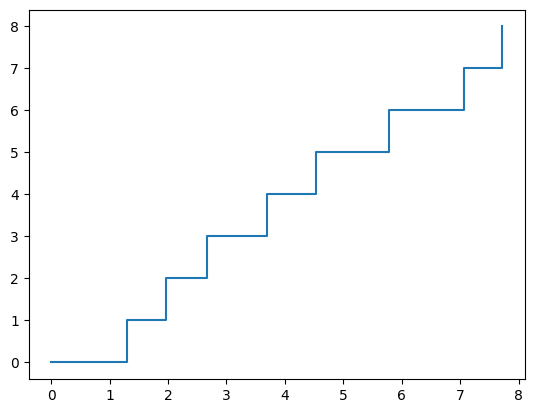

In [32]:
plt.step(np.concatenate([[0], simp]), np.arange(0, len(simp)+1), where='post')

Teraz moze cos niecos bardziej ML'owego niz statystycznego. 

O ile ten kurs dalej istnieje w programie studiów, na komputerowej analizie szeregów czasowych dowiecie się czym jest regresja liniowa i poznacie jawne wzory na współczynniki niezbędne do jej wykonania, wielowymiarowa regresja liniowa jest ju zagadnieniem z dziedziny płytkiego uczenia maszynowego, więc mozna ją uznać za bardzo przystępny przykład do wprowadzenia do ML'a.

Model:
$$
\hat{y} = a x + b
$$

Współczynnik kierunkowy \(a\) w wariancji i kowariancji:
$$
a = \frac{\text{Cov}(X, Y)}{\text{Var}(X)}
$$

Wyraz wolny \(b\):
$$
b = \bar{Y} - a \bar{X}
$$

Definicje wariancji i kowariancji:
$$
\text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{X})^2
$$
$$
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
$$

Średnie:
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i, \quad
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$


In [37]:
def load_data(filename):

    data = np.loadtxt(filename)
    X = data[:, 0].reshape(-1, 1)
    y = data[:, 1]
    return X, y

In [38]:
def linreg(x,y):
    a=(np.cov(x, y)/x.var())[0][1]
    b = -a*x.mean() +y.mean()
    print(a,b)
    return a*x +b

In [39]:
x,y = load_data('zadanie1.txt')

In [45]:
x=x.reshape(-1)

In [46]:
y_pred = linreg(x,y)

4.915373831618322 0.8726721246049864


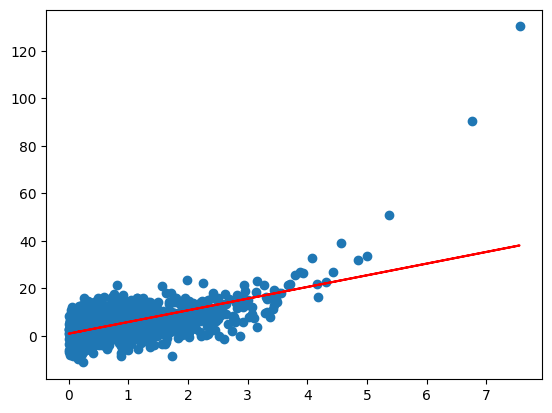

In [47]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')

## Zadania

Zadania są przede wszystkim dla was, nie ma zadnego przymusu zeby zrobić wszystkie na raz, polecam jednak w wolnej chwili je sobie ogarnąć, bo zdobyta wiedza na pewno się rpzyda w czasie dalszego studiowania, a takze uczestniczenia w kole.

Dozwolone jest korzystanie z internetu (byle nie z chatu/innych LLMów). Jeśli tego nie zrobiłem, to przypomnijcie mi zebym kazde zadanie po krótce opisał.

 1. Stwórz tablicę 1D, od zera do 10, stwórz macierz 4x4 z dowolnymi liczbami, wyprintuj 4 ostatnie liczby z tablicy 1D, 3 kolumnę i 2 wiersz macierzy.
 2. Stwórz talicę 1D z 20 wartościami losowymi z rozkładu normalnego (jednostajnego) [0,1], znajdź jej wartość maksymalną i minimalną, zamień wartości poniej 0,2 na zera.
 3. Korzystając z dokumentacji numpy zaproponuj własną metodę obliczania iloczynów skalarnych dla wektorów, a później za pomocą modułu time sprawdź jak wypada w porównaniu z gotową funkcją np.dot oraz z implementacją dla zwykłych pythonowych list.
 4. Za pomocą numpy i dowolnej biblioteki do rysowania wykresów narysuj wykres funkcji sinus, kwadratowej i dowolnie skonstruowanego wielomianu. Extra - wysukaj w internecie wzór na krzywą Gaussa i narysuj ją, poeksperymentuj ze stałymi we wzorze.
 